In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import seaborn as sns
from ExplainableMaximumLikelihoodCalculator import ExplainableMaximumLikelihoodCalculator
import pysam
from Bio import SeqIO, Seq, SeqRecord, pairwise2
from Bio.pairwise2 import format_alignment
from LoadDataUtils import getListOfReadsFromBamFile, getListOfReadsFromFastaFile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
import shap
from scipy.stats import chisquare
from scipy.special import rel_entr
fileNameSapiens =  "data/simulatedData/human_chinese_AF346973_500samples.fas" #File that contains 500 reads from homo sapiens
fileNameNeanderthals =  "data/simulatedData/Neanderthal_Goyet_KX198085_500samples.fas" #File that contains 500 reads from neanderthal
fileNameDenisovans =  "data/simulatedData/denisova_kx663333_500samples.fas" #File that contains 500 reads from denisovan
neanderthals_500_generated = getListOfReadsFromFastaFile(fileNameNeanderthals)
sapiens_500_generated = getListOfReadsFromFastaFile(fileNameSapiens)
denisovan_500_samples = getListOfReadsFromFastaFile(fileNameDenisovans)
path_to_frequencies_table = "data/substitution_matrix.tsv"

2023-06-18 17:01:59.729776: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-18 17:02:00.414744: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-18 17:02:00.534963: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-18 17:02:00.534988: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
sapiens_reference_file_names = [
                    "data/reference_files/human_AF346981_French.fa",
                     "data/reference_files/human_AY195760_Korea.fa",
                      "data/reference_files/human_AY882416_Ethiopia.fa",
                      "data/reference_files/human_AY963586_Italian.fa",
                      "data/reference_files/human_AY195781_Caucasian.fa",
                      "data/reference_files/human_AY195757_Iraqi-Israeli.fa",
                      "data/reference_files/human_AY195749_NativeAmerican.fa"]
neanderthals_reference_file_names = [
                            "data/reference_files/neanderthal_mezmaiskaya1_FM865411.fa",
                           "data/reference_files/Neanderthal_Altai_KC879692.fa",
                           "data/reference_files/Neanderthal_Denisova11_full_mtDNA_KU131206.fa",
                           "data/reference_files/Neanderthal_Spy_94a_MG025538.fa",
                            "data/reference_files/Neanderthal_Vindija33.16_AM948965.fa",
                            "data/reference_files/Neanderthal_Vindija33.19_KJ533545.fa"]
denisovan_reference_file_names = [  
                        "data/reference_files/Denisova_MT576653.1.fa",
                        "data/reference_files/Denisova_MT576652.1.fa",
                        "data/reference_files/Denisova_4_FR695060.fa",
                        "data/reference_files/Denisova_8_KT780370.fa",
                        "data/reference_files/Denisova_manual_phalanx_NC_013993.fa",
                        "data/reference_files/Denisova_MT576651.1.fa"]

In [3]:
def generate_sample(sap, nean, den):
    list_before =  list(np.random.choice(sapiens_500_generated, sap)) + list(np.random.choice(neanderthals_500_generated, nean)) + list(np.random.choice(denisovan_500_samples, den))
    l = []
    for i in list_before:
        l.append(str(i))
    return l

In [4]:
sapiens = 20
neanderthals = 10
denisovans = 20

dataset_1 = generate_sample(sapiens, neanderthals, denisovans)

In [5]:
maximum_likelihood_calculator_d_1 = ExplainableMaximumLikelihoodCalculator(dataset_1,
                                                    ref_neanderthal_file_names=neanderthals_reference_file_names,
                                                    ref_sapien_file_names=sapiens_reference_file_names,
                                                    ref_denisovan_file_names=denisovan_reference_file_names,
                                                    path_to_substitution_matrix=path_to_frequencies_table,
                                                    number_of_jobs=-1)

Loading sequences and calculating alignments to all references, this might take a while. Number of reads:  50
start working on read number 0
start working on read number 40


In [33]:
a

[[0.33333333333333337, 0.33333333333333337, 0.33333333333333337],
 [0.4998797674163941, 0.4998797674163941, 0.00024046516721181076],
 [0.999999910074763, 8.991288027412991e-08, 1.2356574674675946e-11],
 [0.9708674049957704, 0.0014002442327889588, 0.027732350771440675],
 [0.33333333333333337, 0.3333333333333333, 0.3333333333333333],
 [0.3333333333333333, 0.3333333333333333, 0.3333333333333333],
 [0.49999994487837623, 0.49999994487837623, 1.1024324745267353e-07],
 [0.5623690713684527, 0.00016627696136569642, 0.43746465167018167],
 [0.545349033962998, 0.45448516226457036, 0.0001658037724314701],
 [0.955505053017099, 0.032167925191640905, 0.012327021791260228],
 [0.9999998456542731, 1.539769205182325e-07, 3.6880628957096836e-10],
 [0.8122380650001224, 0.1241184372886772, 0.0636434977112004],
 [0.9999929897985411, 1.1425569633015314e-06, 5.867644495586673e-06],
 [0.9999999999999996, 5.0906577657346125e-16, 3.15994536010575e-19],
 [0.4977080658578379, 0.5022919341297999, 1.236223877734412e-1

In [35]:
averages = [np.mean([a[i]]) for i in range(50)]


In [39]:
influence_on_highest = [t[1] for t in a]


In [40]:
influence_on_highest

[0.33333333333333337,
 0.4998797674163941,
 8.991288027412991e-08,
 0.0014002442327889588,
 0.3333333333333333,
 0.3333333333333333,
 0.49999994487837623,
 0.00016627696136569642,
 0.45448516226457036,
 0.032167925191640905,
 1.539769205182325e-07,
 0.1241184372886772,
 1.1425569633015314e-06,
 5.0906577657346125e-16,
 0.5022919341297999,
 0.3333333333333333,
 1.459821904868767e-10,
 0.3333333333333333,
 0.0008646076884442039,
 0.00025343539080866683,
 0.9999999789982782,
 0.4999421022994615,
 0.8568054272647474,
 0.49992400345417376,
 0.8731295423686912,
 0.5842641824212758,
 0.998559816070695,
 0.9996960452601538,
 0.49992400345417376,
 0.49172285691925305,
 8.534593027086027e-06,
 0.038813379705635406,
 0.3333333333333333,
 0.33333333333333326,
 1.0235354099632817e-05,
 1.1970444589999154e-07,
 0.3333333333333333,
 0.3683873549681919,
 2.1290414094433796e-05,
 0.3677415408171529,
 0.49999994139376025,
 9.203700684041131e-10,
 1.296778558118828e-10,
 0.38879543147169476,
 0.499583060

In [7]:
a = maximum_likelihood_calculator_d_1.get_A_s_d_values()

In [22]:
sapiens = [t[0] for t in a]
nean = [t[1] for t in a]
denisovan = [t[2] for t in a]

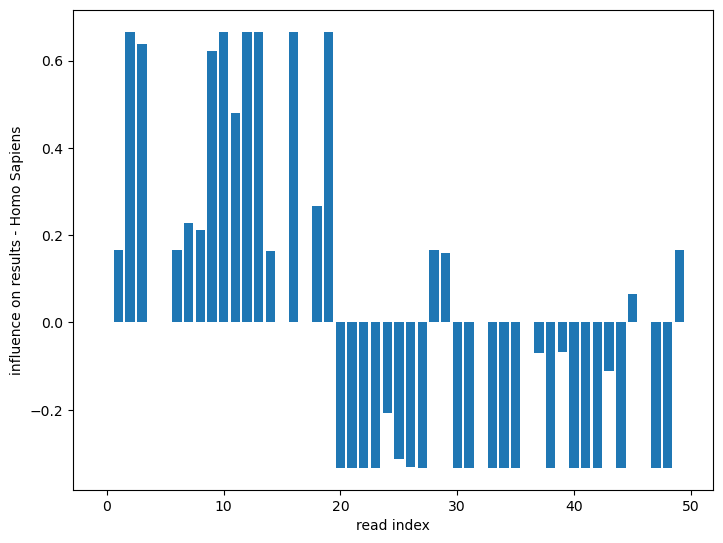

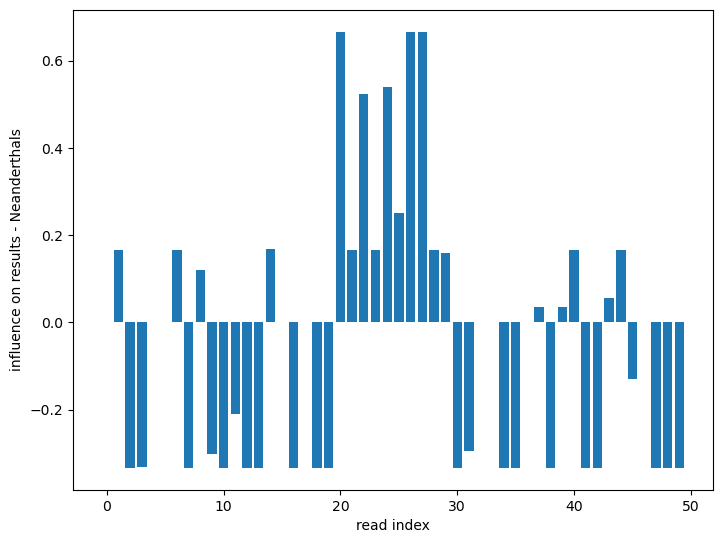

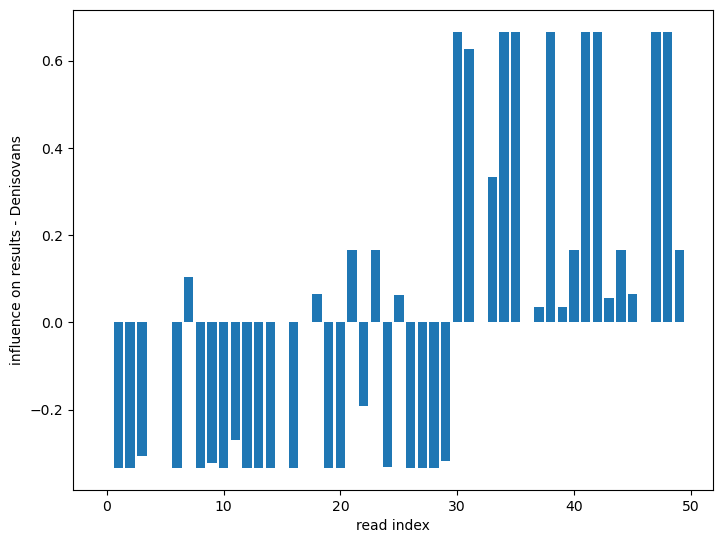

In [32]:
plotter(50, sapiens, nean, denisovan)

In [31]:
def plotter(number_of_Reads, sap, nen, deni):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    reads = [i for i in range(number_of_Reads)]
    averages = [np.mean([sap[i], nen[i], deni[i]]) for i in range(number_of_Reads)]
    sap = [sap[i]-averages[i] for i in range(number_of_Reads)]
    nen = [nen[i]-averages[i] for i in range(number_of_Reads)]
    
    deni = [deni[i]-averages[i] for i in range(number_of_Reads)]
    
                        
    ax.bar(reads,sap)
    ax.set_xlabel("read index")
    ax.set_ylabel("influence on results - Homo Sapiens")
    plt.show()

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(reads,nen)
    ax.set_xlabel("read index")
    ax.set_ylabel("influence on results - Neanderthals")
    plt.show()

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(reads,deni)
    ax.set_xlabel("read index")
    ax.set_ylabel("influence on results - Denisovans")
    plt.show()

In [29]:
shaps = maximum_likelihood_calculator_d_1.calculate_shapley_values(5000)

1


  0%|          | 0/1 [00:00<?, ?it/s]

1
5000


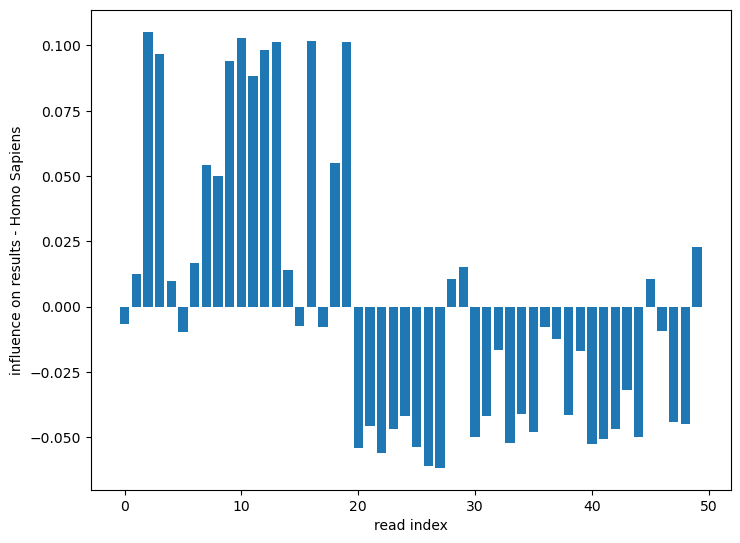

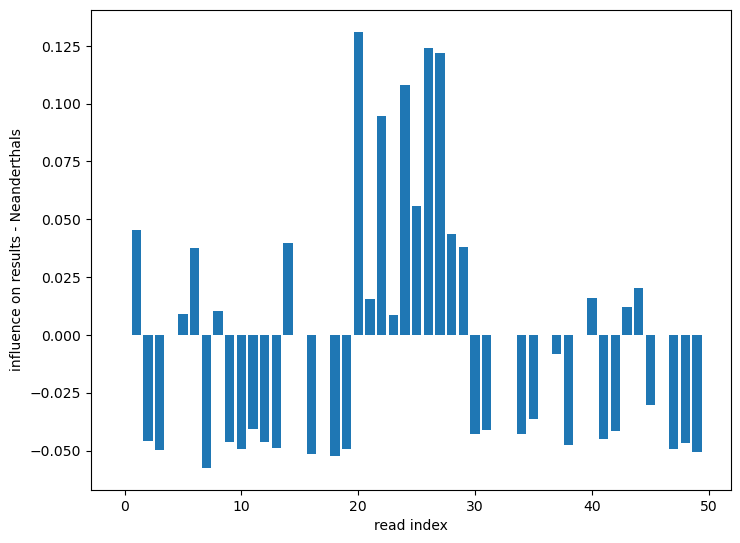

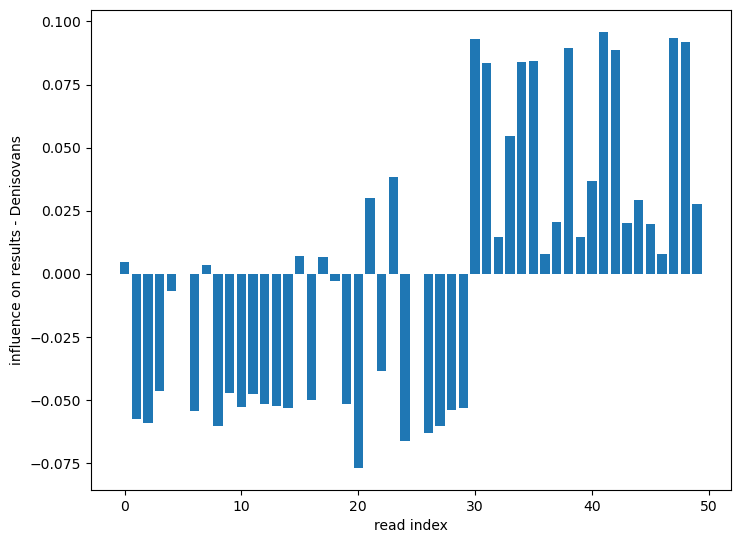

In [30]:
maximum_likelihood_calculator_d_1.plot_influence_values(shaps)

In [28]:
arr = [array([[ 0.00417911,  0.021357  ,  0.10813727,  0.09926801,  0.00644735,
          0.00422024,  0.01803077,  0.04854958,  0.04895294,  0.09843752,
          0.08956253,  0.07845069,  0.10035479,  0.10165185,  0.00952266,
         -0.0043879 ,  0.0863799 , -0.0034657 ,  0.05640987,  0.09893097,
         -0.0590688 , -0.04742531, -0.0616234 , -0.05101327, -0.04314222,
         -0.05180868, -0.05489908, -0.06261203,  0.01798803,  0.00599888,
         -0.05184769, -0.03886667, -0.00478909, -0.04957498, -0.04515377,
         -0.04032308, -0.00744308, -0.0235989 , -0.05101767, -0.01318123,
         -0.05796473, -0.04115282, -0.04317252, -0.02421651, -0.0515543 ,
          0.00723525, -0.01025221, -0.03890688, -0.04567243,  0.01806975]]),
 array([[-0.00780951,  0.04172669, -0.05110125, -0.05209883, -0.00303095,
          0.        ,  0.04201659, -0.04714427,  0.0132544 , -0.05436931,
         -0.04294655, -0.03064093, -0.04837293, -0.05287179,  0.04983696,
          0.00331773, -0.04248314,  0.        , -0.05354134, -0.0564557 ,
          0.12650519,  0.01611655,  0.10490234,  0.01827145,  0.10443881,
          0.05821263,  0.11835589,  0.12745164,  0.03588856,  0.0424178 ,
         -0.04453927, -0.04501823,  0.        , -0.00945133, -0.04605809,
         -0.05061235,  0.        ,  0.01340273, -0.04253133,  0.        ,
          0.02767153, -0.0490127 , -0.05258615,  0.00376184,  0.01771709,
         -0.02541482,  0.        , -0.05043824, -0.04504858, -0.05168884]]),
 array([[ 0.00349632, -0.06296121, -0.05689964, -0.04710251, -0.0032641 ,
         -0.00317619, -0.05993931,  0.        , -0.06189754, -0.04405871,
         -0.04664034, -0.04777324, -0.05183218, -0.0487579 , -0.05933222,
          0.        , -0.04379694,  0.        , -0.00284642, -0.04243348,
         -0.06726471,  0.03146553, -0.04319863,  0.03287553, -0.06126338,
         -0.00627159, -0.06326752, -0.06459703, -0.0537622 , -0.04826589,
          0.09659864,  0.08408865,  0.00458892,  0.05939275,  0.09135549,
          0.09098391,  0.00695439,  0.01029989,  0.09352713,  0.01194626,
          0.03031681,  0.09028366,  0.09576608,  0.02053399,  0.03394733,
          0.01840834,  0.0098686 ,  0.08953004,  0.09068669,  0.03368796]])]

NameError: name 'array' is not defined